MNIST solve by keras  
https://keras.io/examples/vision/mnist_convnet/

In [1]:
import numpy as np
import tensorflow as tf
import pickle
import matplotlib.pyplot as plt

In [2]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


# Testing

In [3]:
import cv2, sys, os
import numpy as np
import matplotlib.pyplot as plt
from my_mnist import *

In [4]:
model = pickle.load( open( "models/1350-66.p", "rb" ) )

In [43]:
strokes = [2, 4, 8, 16, 32]

x_testing = []
y_testing = []
for nombre in range(10):
    for stroke in strokes:
        for name in range(15):
            if os.path.isfile(f"imageGen/28/{nombre}/{stroke}/{name}.png"):
                img = cv2.imread(f"imageGen/28/{nombre}/{stroke}/{name}.png")
                img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
                img = (255-img)/255
                x_testing.append(img)
                y = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
                y[nombre] = 1
                y_testing.append(y)
x_testing = np.array(x_testing).reshape(len(x_testing), 784)
y_testing = np.array(y_testing)
x_testing.shape

(745, 784)

In [41]:
predict, loss = model.predict_loss(x_testing, y_testing)
print("Test loss:", loss)
print("Test accuracy:", sum(predict.argmax(axis=1) == y_testing.argmax(axis=1))/len(predict))

Test loss: 0.09436917878114777
Test accuracy: 0.2085201793721973


In [45]:
model.compute_accuracy(x_testing, y_testing)

0.20536912751677852

In [147]:
model.fit(x_testing, y_testing, epochs=5)

Epoch 1/5
14/14 [==============================] - 0s 11ms/step - loss: 1.1421 - accuracy: 0.7085
Epoch 2/5
14/14 [==============================] - 0s 10ms/step - loss: 0.6239 - accuracy: 0.8184
Epoch 3/5
14/14 [==============================] - 0s 10ms/step - loss: 0.3621 - accuracy: 0.8991
Epoch 4/5
14/14 [==============================] - 0s 10ms/step - loss: 0.2064 - accuracy: 0.9439
Epoch 5/5
14/14 [==============================] - 0s 11ms/step - loss: 0.1688 - accuracy: 0.9529


In [44]:
for i in range(100):
    loss = model.backpropagation(x_testing, y_testing)

In [47]:
model.layers[0].lr

0.001

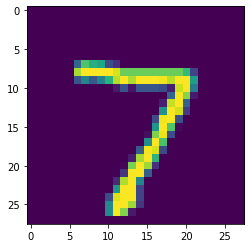

In [19]:
plt.imshow(x_test[0])

In [23]:
x_test[0].shape

(28, 28, 1)